In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

movie_reviews = pd.read_csv(r'E:\DQ\data\fandango\fandango_score_comparison.csv')
movie_reviews[:2]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5


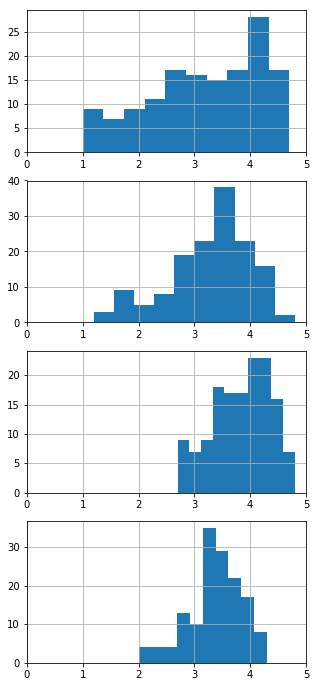

In [22]:
## looking at the histogram of the user ratings over 4 sites

fig = plt.figure(figsize=(5,12))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)
ax4.set_xlim(0,5.0)

movie_reviews["RT_user_norm"].hist(ax=ax1)
movie_reviews["Metacritic_user_nom"].hist(ax=ax2)
movie_reviews["Fandango_Ratingvalue"].hist(ax=ax3)
movie_reviews["IMDB_norm"].hist(ax=ax4)
plt.show()

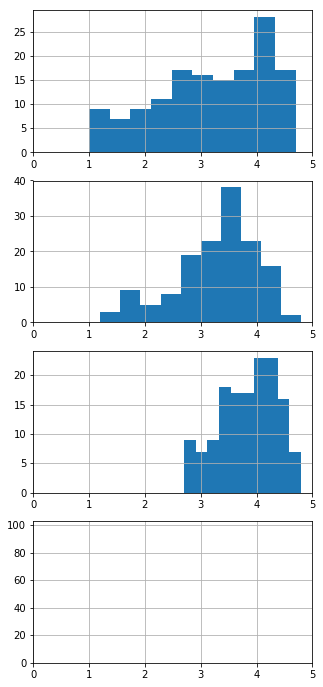

In [23]:
## improvement over last block
column_list = ['RT_user_norm','Metacritic_user_nom','Fandango_Ratingvalue','IMDB_norm']
fig = plt.figure(figsize=(5,12))

for i in range(0,4):
    ax = fig.add_subplot(4,1,i+1)
    ax.set_xlim(0,5.0)
    movie_reviews[column_list[i]].hist(ax=ax)

plt.show()


In [4]:
# Calculating Mean
column_list = ['RT_user_norm','Metacritic_user_nom','Fandango_Ratingvalue','IMDB_norm']
user_reviews = movie_reviews[column_list]
def calc_mean(pd_series):
    return pd_series.mean()

user_reviews_mean = user_reviews.apply(calc_mean)

rt_mean = user_reviews_mean[0]
mc_mean = user_reviews_mean[1]
fg_mean = user_reviews_mean[2]
id_mean = user_reviews_mean[3]

print(rt_mean)
print(mc_mean)
print(fg_mean)
print(id_mean)

3.19383561644
3.2595890411
3.84520547945
3.36849315068


In [54]:
# reviews variance and standard deviation

def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    vvals = series.values
    mean = calc_mean(vvals)
    return sum([(xi - mean)**2 for xi in vvals]) / (len(vvals) - 1)

user_reviews_var = user_reviews.apply(calc_variance)
rt_var = user_reviews_var[0]
rt_stdev = rt_var**.5
mc_var = user_reviews_var[0]
mc_stdev = mc_var**.5
fg_var = user_reviews_var[0]
fg_stdev = fg_var**.5
id_var = user_reviews_var[0]
id_stdev = id_var**.5
print(rt_var)
print(rt_stdev)

AttributeError: ("'numpy.ndarray' object has no attribute 'values'", 'occurred at index RT_user_norm')

In [57]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean
def calc_variance(series):
    mean = calc_mean(series)
    squared_deviations = (series - mean)**2
    mean_squared_deviations = calc_mean(squared_deviations)
    return mean_squared_deviations

columns = ["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]
user_reviews = movie_reviews[columns]
user_reviews_variances = user_reviews.apply(calc_variance)

rt_var = user_reviews_variances["RT_user_norm"]
mc_var = user_reviews_variances["Metacritic_user_nom"]
fg_var = user_reviews_variances["Fandango_Ratingvalue"]
id_var = user_reviews_variances["IMDB_norm"]

rt_stdev = rt_var ** (1/2)
mc_stdev = mc_var ** (1/2)
fg_stdev = fg_var ** (1/2)
id_stdev = id_var ** (1/2)

print("Rotten Tomatoes (variance):", rt_var)
print("Metacritic (variance):", mc_var)
print("Fandango (variance):", fg_var)
print("IMDB (variance):", id_var)

print("Rotten Tomatoes (standard deviation):", rt_stdev)
print("Metacritic (standard deviation):", mc_stdev)
print("Fandango (standard deviation):", fg_stdev)
print("IMDB (standard deviation):", id_stdev)

Rotten Tomatoes (variance): 0.995578438731
Metacritic (variance): 0.566654625633
Fandango (variance): 0.251107149559
IMDB (variance): 0.228219647213
Rotten Tomatoes (standard deviation): 0.997786770173
Metacritic (standard deviation): 0.752764654878
Fandango (standard deviation): 0.501105926486
IMDB (standard deviation): 0.47772340032


In [5]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    mean = calc_mean(series)
    return sum([(xi - mean)**2 for xi in series]) / (len(series))

user_reviews_var = user_reviews.apply(calc_variance)
rt_var = user_reviews_var[0]
rt_stdev = rt_var**.5
mc_var = user_reviews_var[0]
mc_stdev = mc_var**.5
fg_var = user_reviews_var[0]
fg_stdev = fg_var**.5
id_var = user_reviews_var[0]
id_stdev = id_var**.5
print(rt_var)
print(rt_stdev)

0.995578438731
0.997786770173


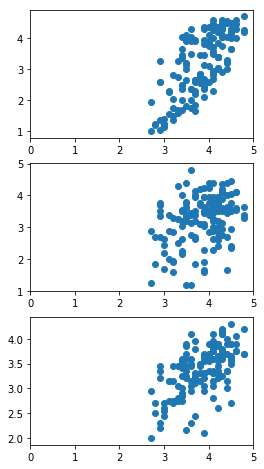

In [69]:
## looking at the histogram of the user ratings over 4 sites

column_list = ['RT_user_norm','Metacritic_user_nom','Fandango_Ratingvalue','IMDB_norm']

fig = plt.figure(figsize=(4,8))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)


ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)

ax1.scatter(movie_reviews['Fandango_Ratingvalue'],movie_reviews['RT_user_norm'])
ax2.scatter(movie_reviews['Fandango_Ratingvalue'],movie_reviews['Metacritic_user_nom'])
ax3.scatter(movie_reviews['Fandango_Ratingvalue'],movie_reviews['IMDB_norm'])

plt.show()

In [67]:
# calculate covariance

def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def covariance(col1, col2):
    mean1 = col1.mean()
    mean2 = col2.mean()
    return sum([(x - mean1)*(y - mean2)for x,y in zip(col1,col2)])/len(col1) 

rt_fg_covar = covariance(movie_reviews['RT_user_norm'],movie_reviews['Fandango_Ratingvalue'])
mc_fg_covar = covariance(movie_reviews['Metacritic_user_nom'],movie_reviews['Fandango_Ratingvalue'])
id_fg_covar = covariance(movie_reviews['IMDB_norm'],movie_reviews['Fandango_Ratingvalue'])

print(rt_fg_covar)
print(mc_fg_covar)
print(id_fg_covar)

0.362162225558
0.127100769375
0.143718802777


In [70]:
# Calculate Correlation

def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    mean = calc_mean(series)
    squared_deviations = (series - mean)**2
    mean_squared_deviations = calc_mean(squared_deviations)
    return mean_squared_deviations

def calc_covariance(series_one, series_two):
    x = series_one.values
    y = series_two.values
    x_mean = calc_mean(series_one)
    y_mean = calc_mean(series_two)
    x_diffs = [i - x_mean for i in x]
    y_diffs = [i - y_mean for i in y]
    codeviates = [x_diffs[i] * y_diffs[i] for i in range(len(x))]
    return sum(codeviates) / len(codeviates)

def calc_correlation(series_one, series_two):
    cov = calc_covariance(series_one,series_two)
    var = (calc_variance(series_one)*calc_variance(series_two))**(1/2)
    return cov/var

rt_fg_covar = calc_covariance(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_covar = calc_covariance(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_covar = calc_covariance(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

rt_fg_corr = calc_correlation(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_corr = calc_correlation(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_corr = calc_correlation(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

print(rt_fg_corr)
print(mc_fg_corr)
print(id_fg_corr)

0.724328994249
0.336945314265
0.600354177263
